# IRC0218 (z = 1.62) Cluster & Field D4000 Comparison Study 
## D4000 vs. Sersic Index, Effective Radius, Mass, Stellar Surface Mass Density 
   ## Divided by Quiscent/Star Forming and Mass Complete (lmass > 10.2)
# by Jenn Cooper 
# Last modified 5 July 2018

In [164]:
run /Users/jennifercooper/bootstrap_err.py

## Sersic Index n

BCES, 10000 trials... 
2.848519 s
BCES, 10000 trials... 
2.813930 s
BCES, 10000 trials... 
2.842041 s


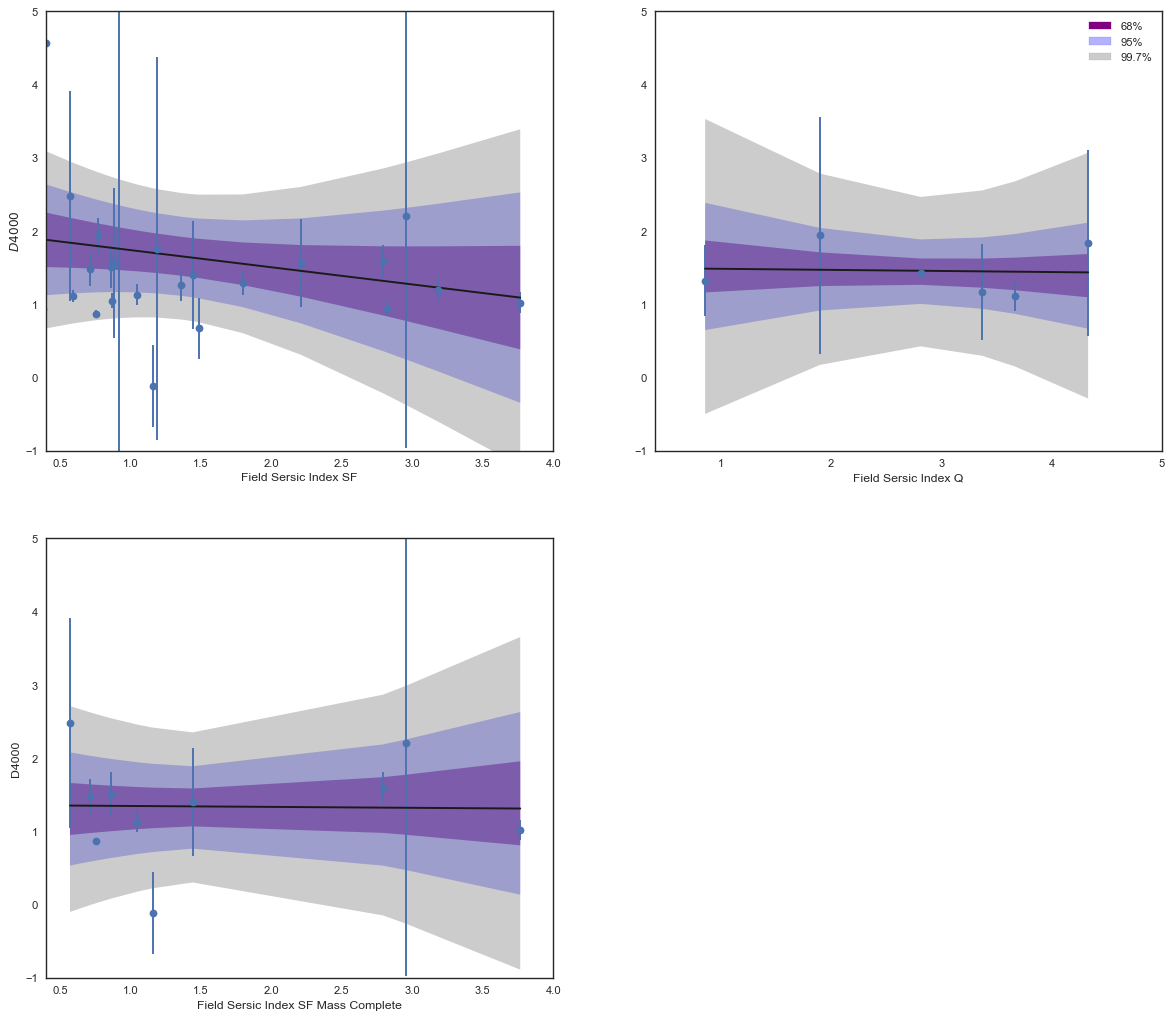

In [137]:
fieldn(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.967262 s
BCES, 10000 trials... 
2.921146 s
BCES, 10000 trials... 
2.902274 s
BCES, 10000 trials... 
2.946397 s


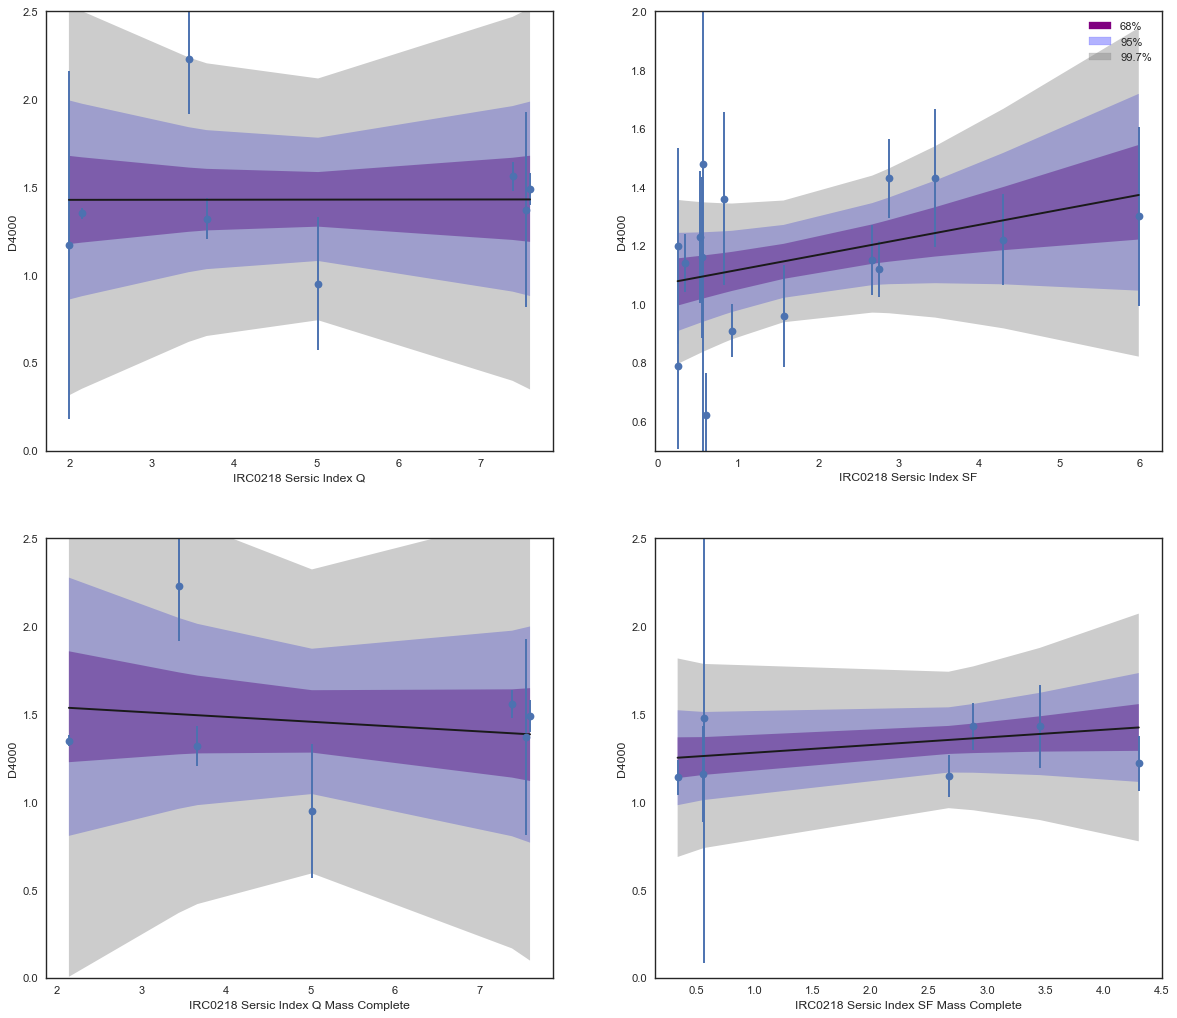

In [135]:
ircn(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

# Effective Radius 

BCES, 10000 trials... 
2.946008 s
BCES, 10000 trials... 
3.146784 s
BCES, 10000 trials... 
2.848539 s


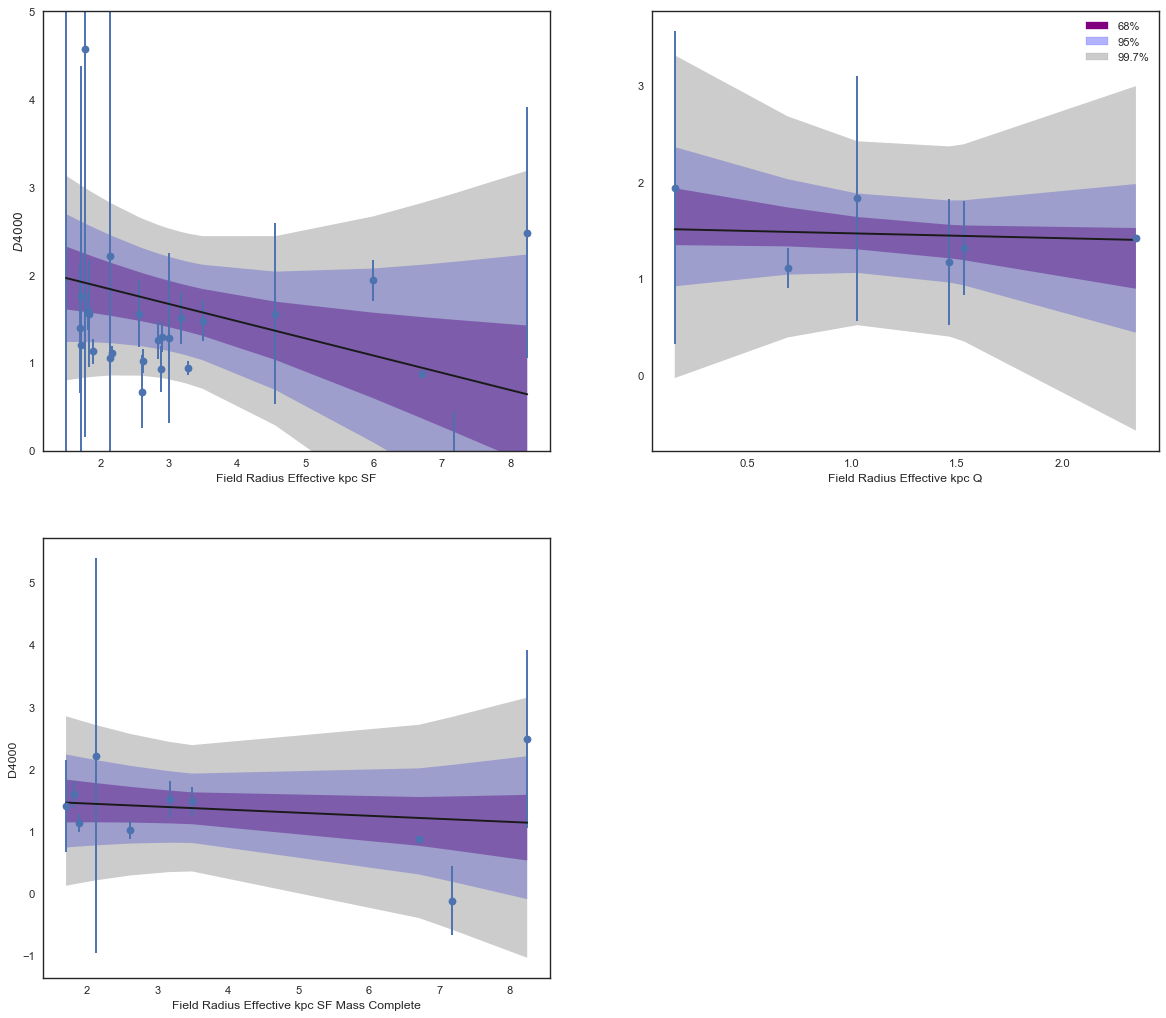

In [147]:
fieldr(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.887335 s
BCES, 10000 trials... 
3.043360 s
BCES, 10000 trials... 
2.762488 s
BCES, 10000 trials... 
2.762090 s


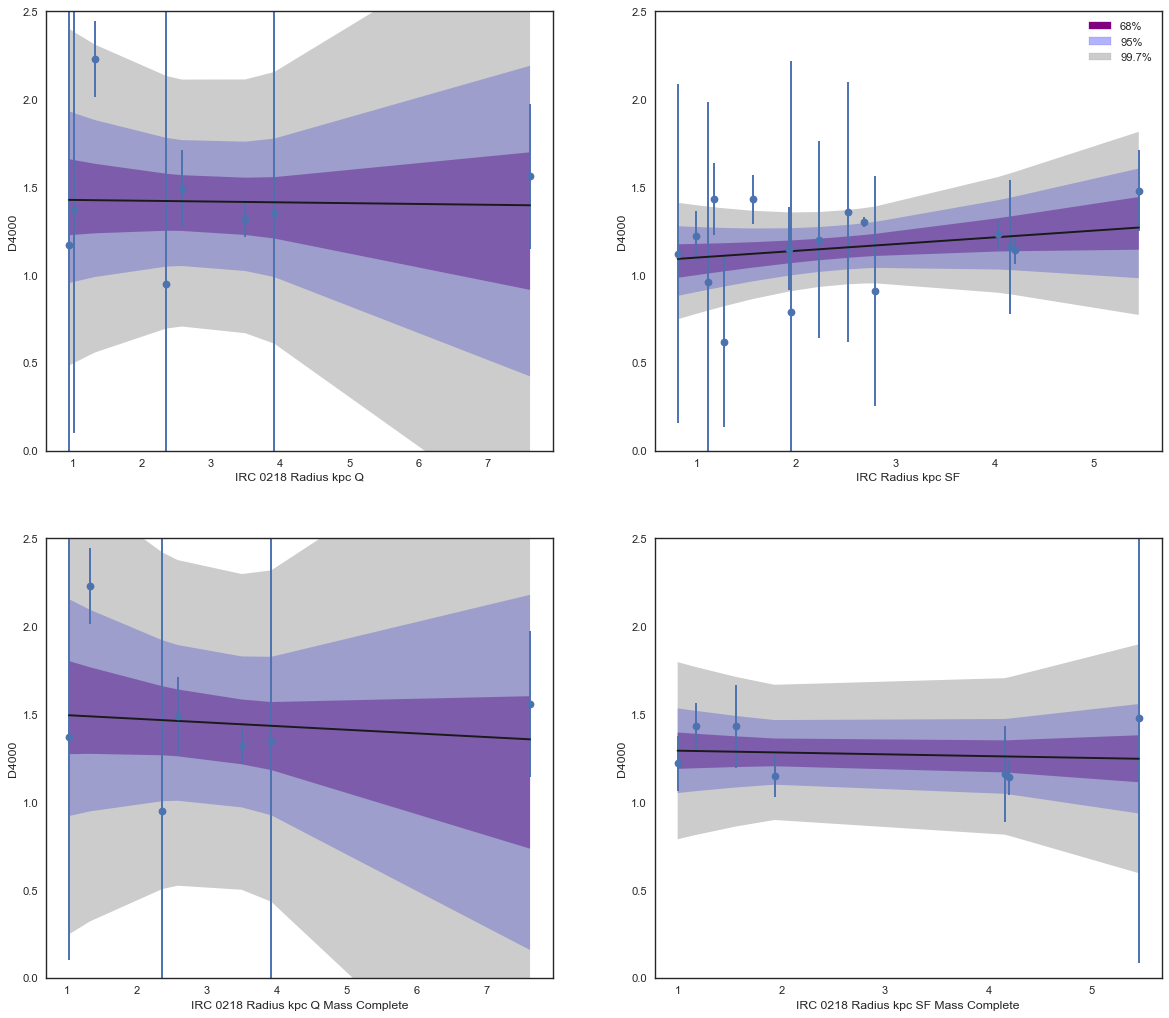

In [141]:
ircr(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

# Mass

BCES, 10000 trials... 
2.787186 s
BCES, 10000 trials... 
2.806199 s
BCES, 10000 trials... 
2.842020 s


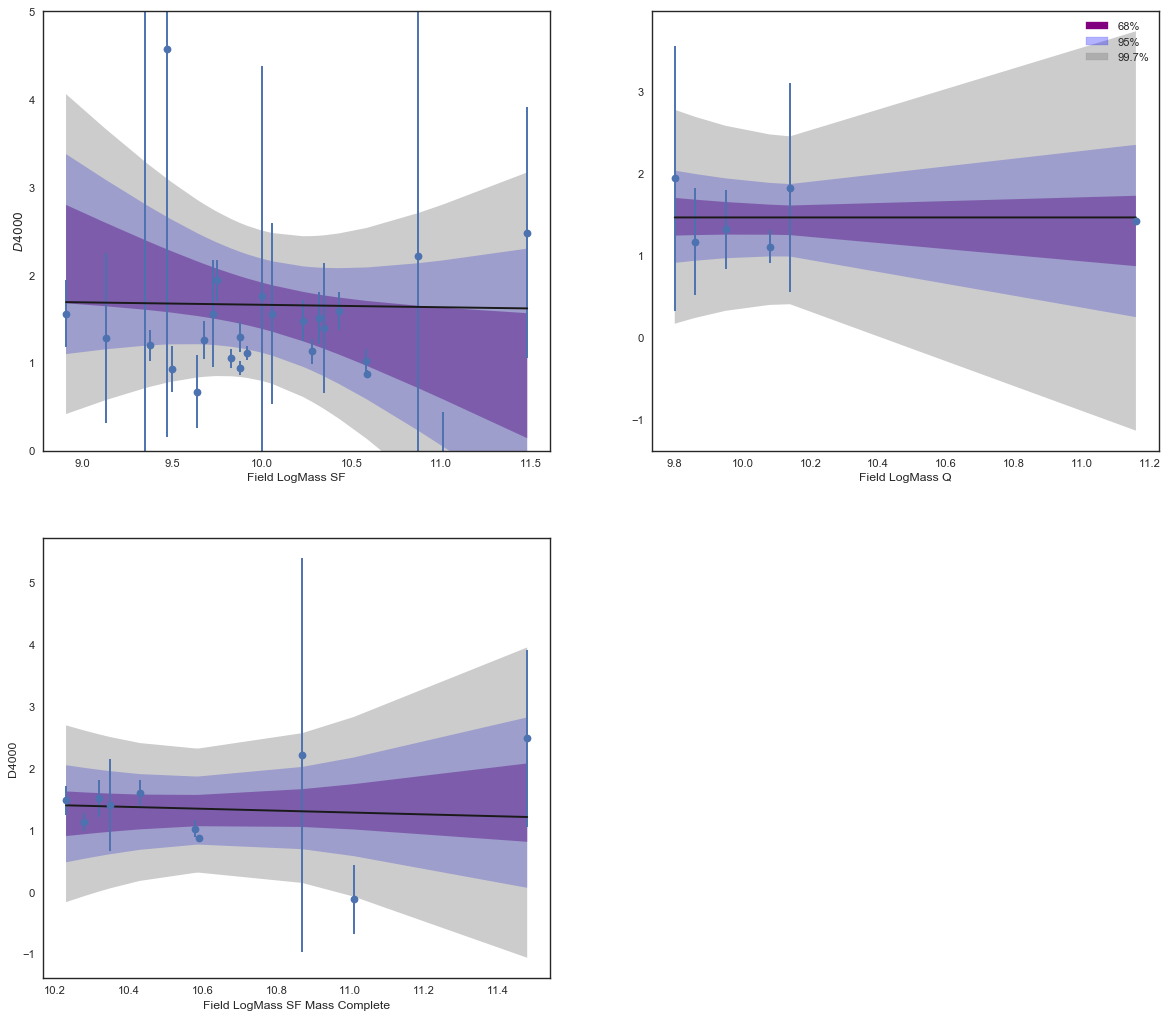

In [149]:
fieldm(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.790186 s
BCES, 10000 trials... 
3.434804 s
BCES, 10000 trials... 
2.857528 s
BCES, 10000 trials... 
2.773905 s


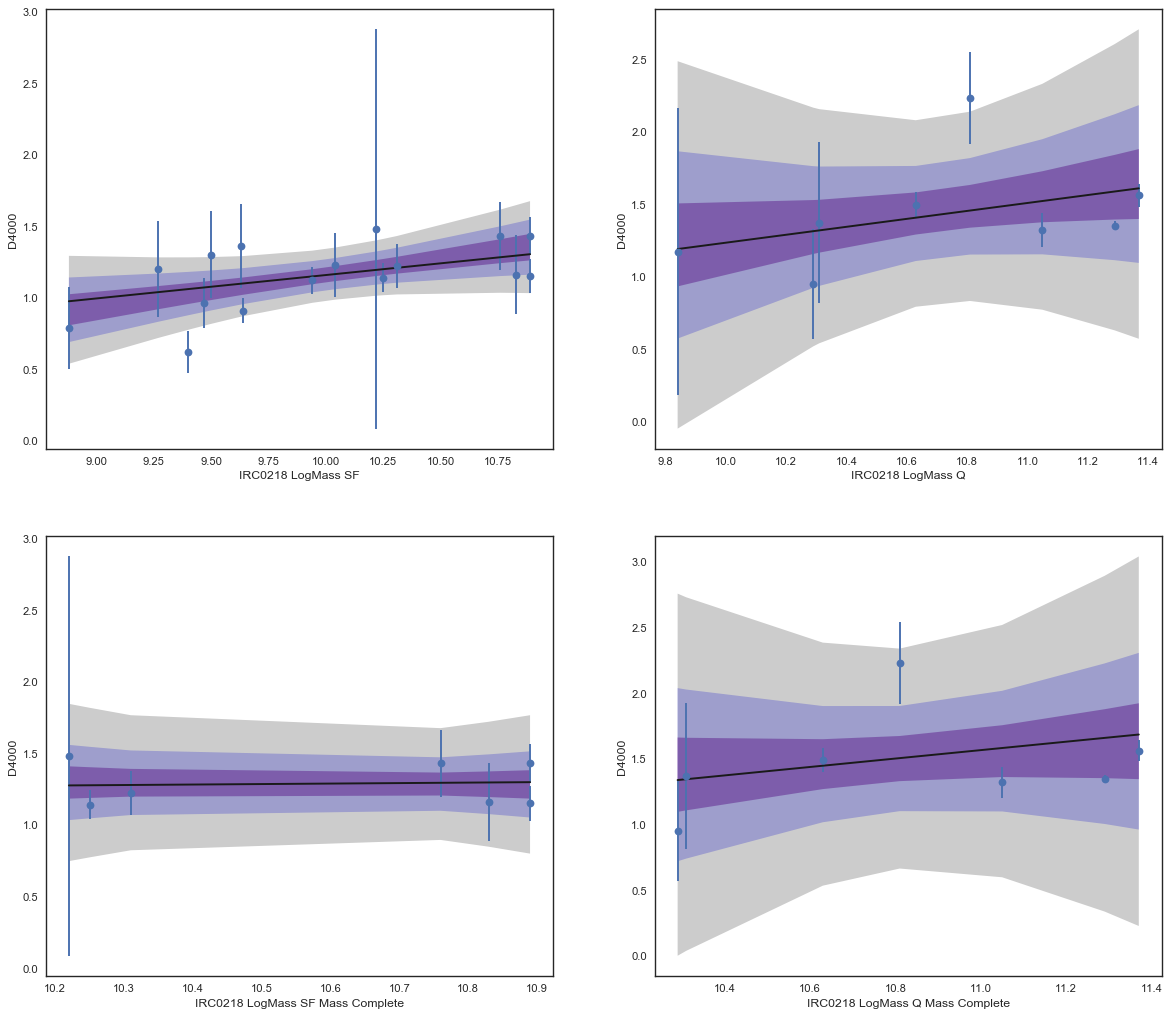

In [159]:
ircm(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

# Mass/Radius Relations 

BCES, 10000 trials... 
3.031697 s
BCES, 10000 trials... 
3.212109 s
BCES, 10000 trials... 
3.019433 s
BCES, 10000 trials... 
2.853463 s


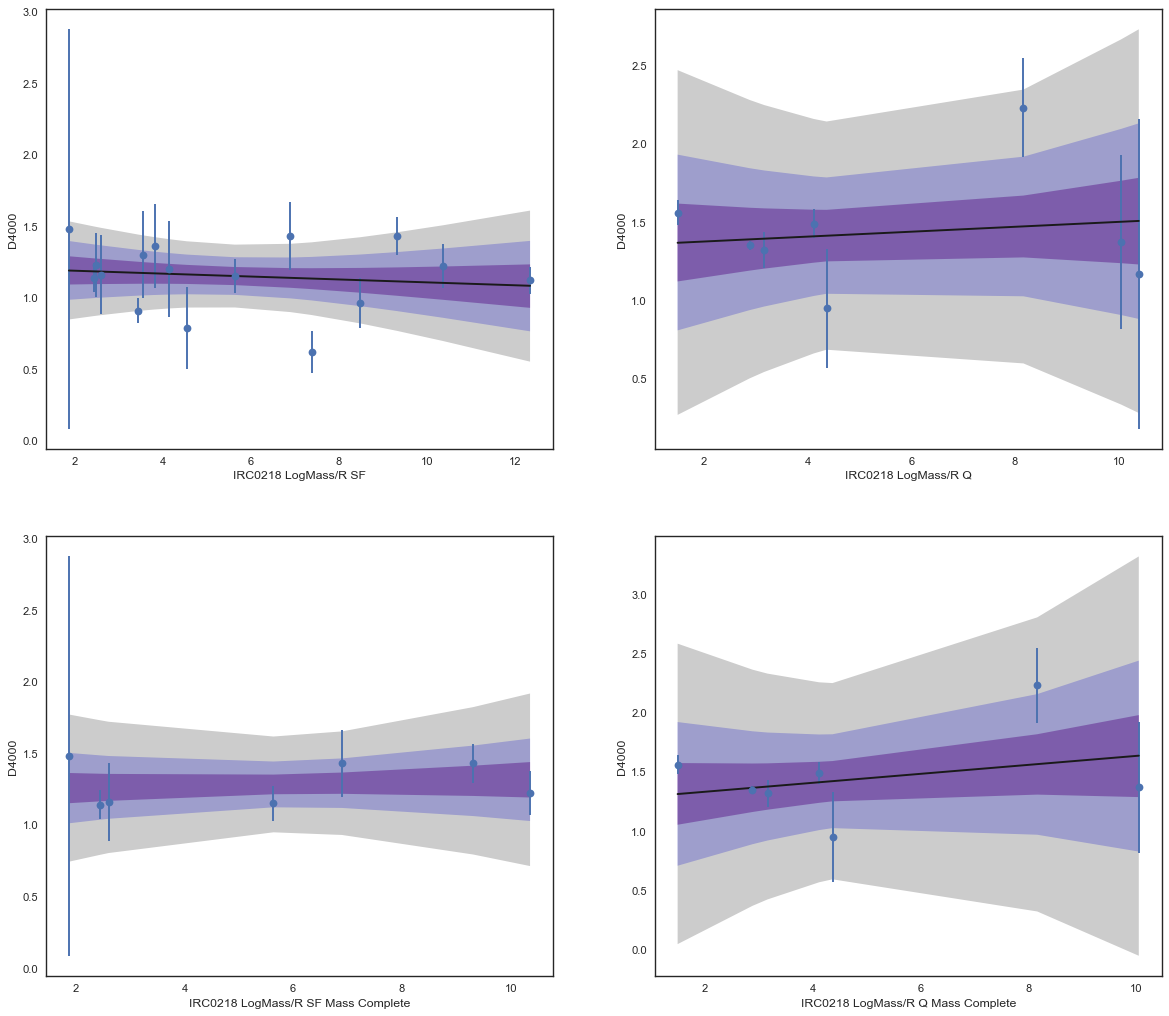

In [161]:
ircmr(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.787089 s
BCES, 10000 trials... 
2.782146 s
BCES, 10000 trials... 
2.847621 s
BCES, 10000 trials... 
3.331188 s


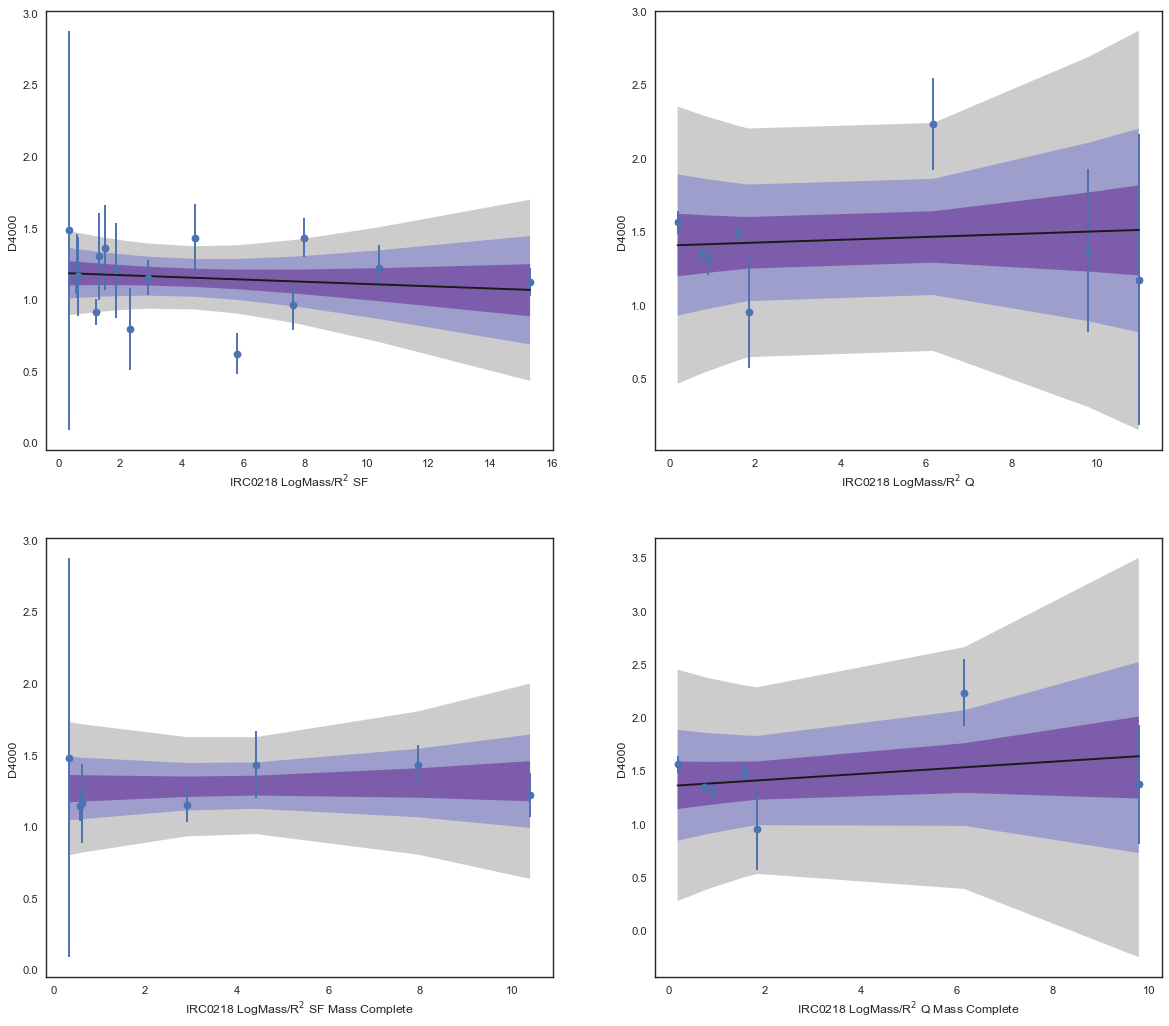

In [163]:
ircmr2(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.778591 s
BCES, 10000 trials... 
2.794232 s
BCES, 10000 trials... 
2.764145 s
BCES, 10000 trials... 
2.767864 s


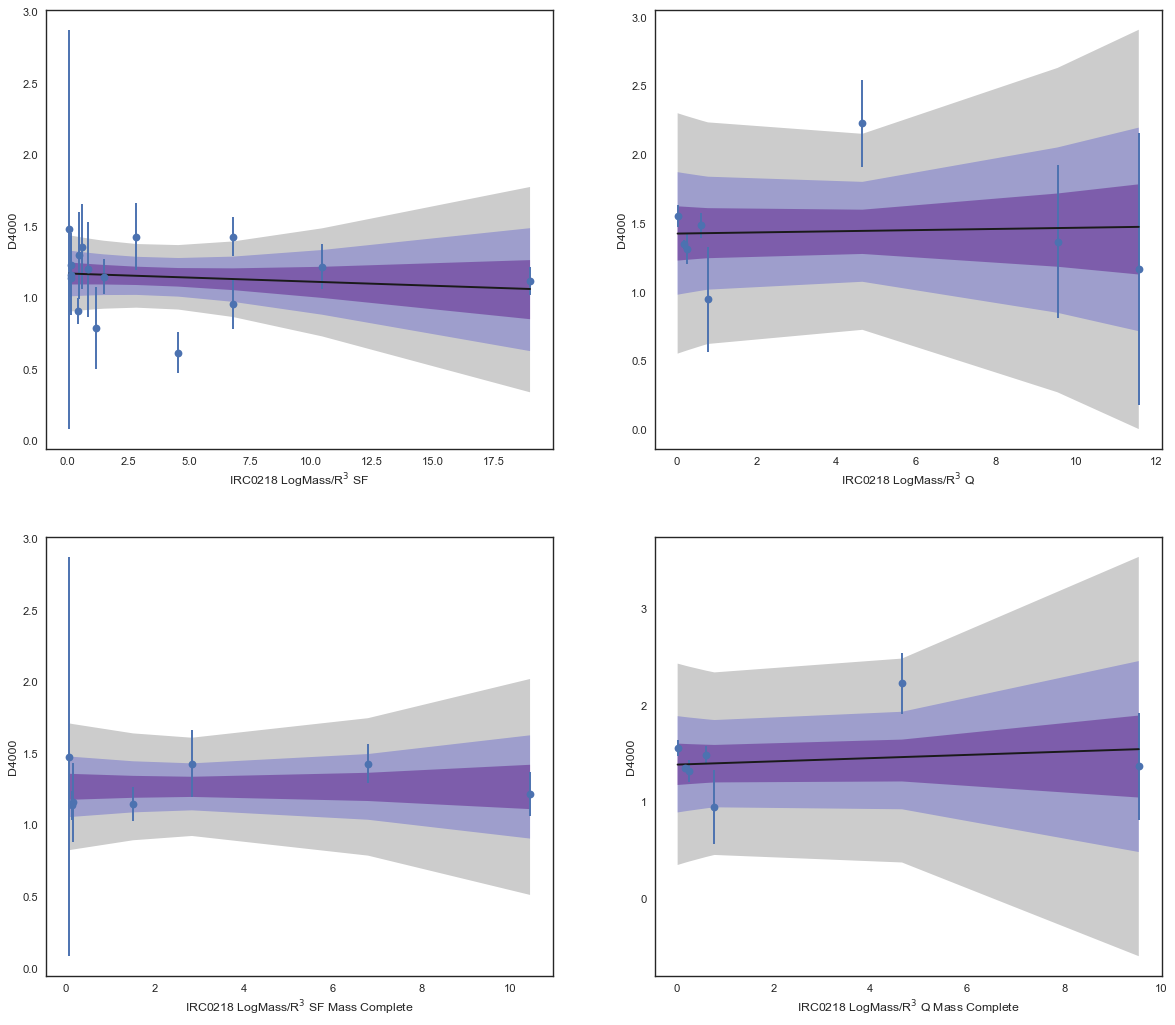

In [165]:
ircmr3(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

# Stellar Surface Mass Density within 1 kpc 

BCES, 10000 trials... 
2.767666 s
BCES, 10000 trials... 
2.757036 s
BCES, 10000 trials... 
2.774767 s


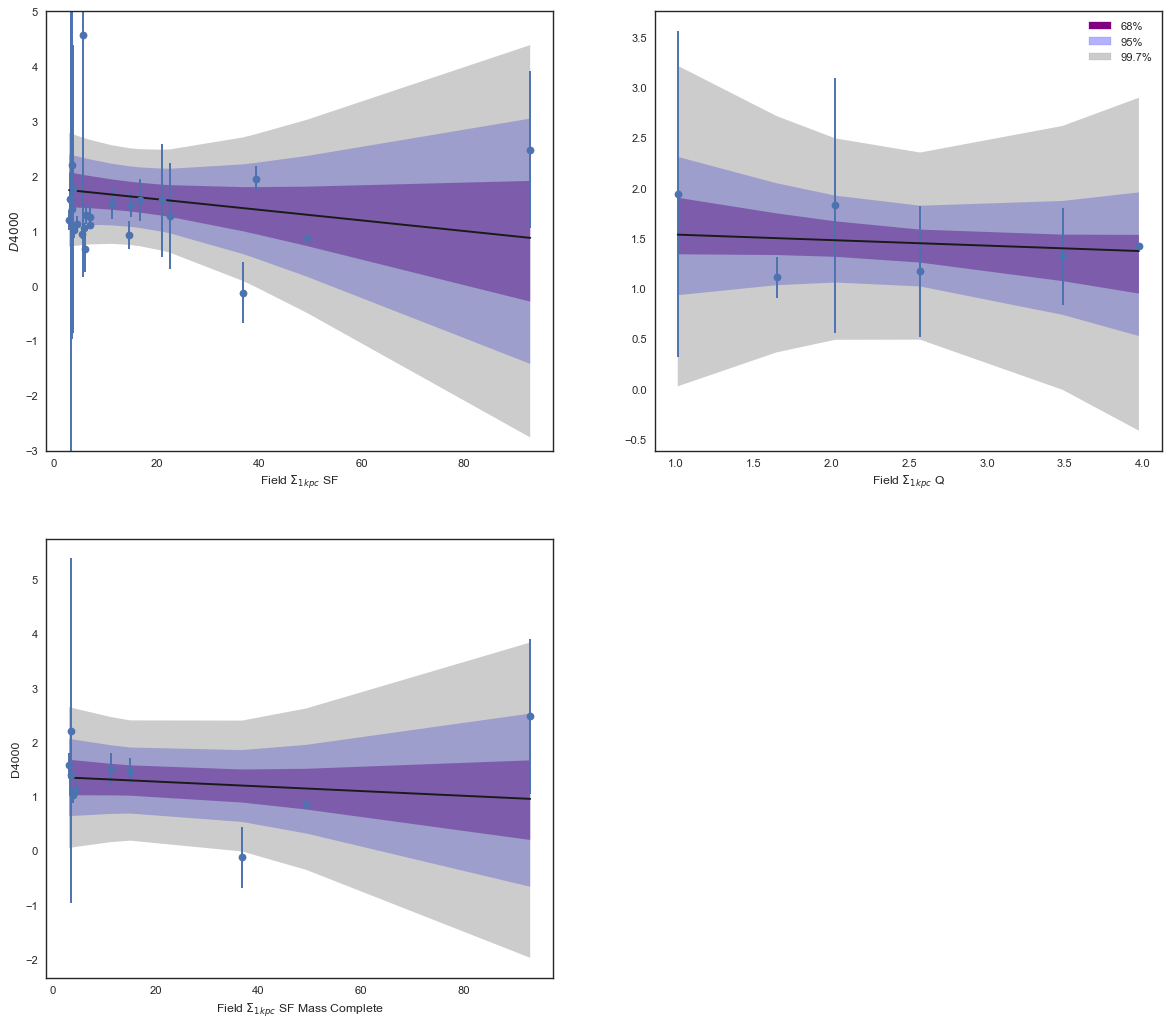

In [129]:
fieldssmd(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

BCES, 10000 trials... 
2.909994 s
BCES, 10000 trials... 
3.210074 s
BCES, 10000 trials... 
3.049633 s
BCES, 10000 trials... 
3.053577 s


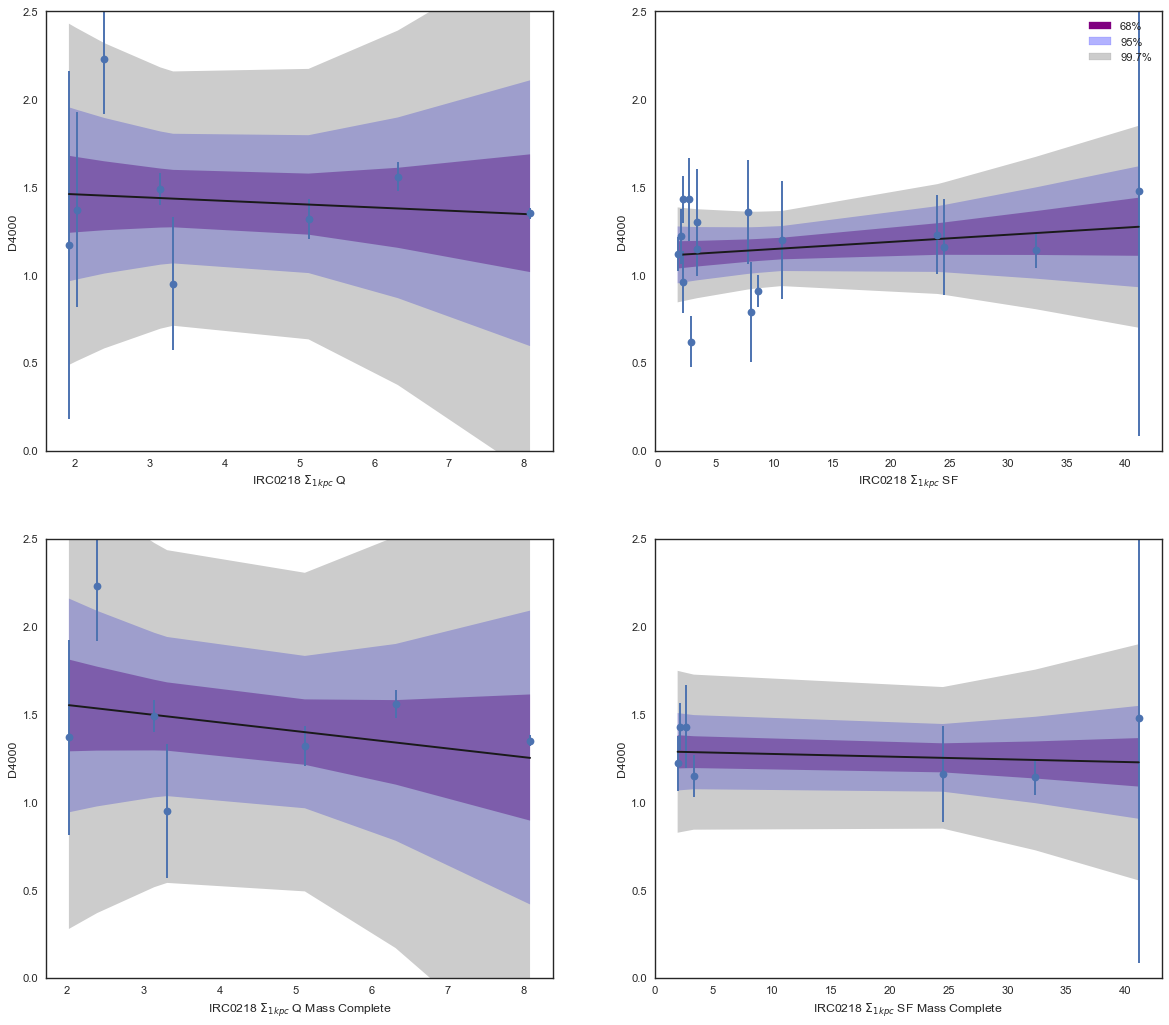

In [143]:
ircssmd(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3)

# Q & SF together for all parameters 

BCES, 10000 trials... 
2.780452 s
BCES, 10000 trials... 
2.781352 s


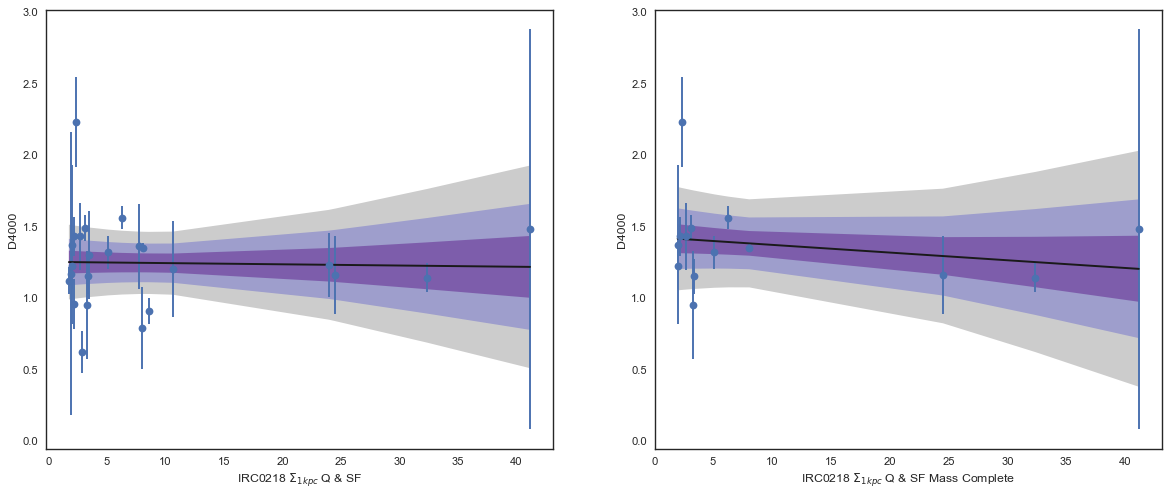

In [115]:
ircssmd_all(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3,xcb1)

BCES, 10000 trials... 
2.789576 s
BCES, 10000 trials... 
2.782752 s


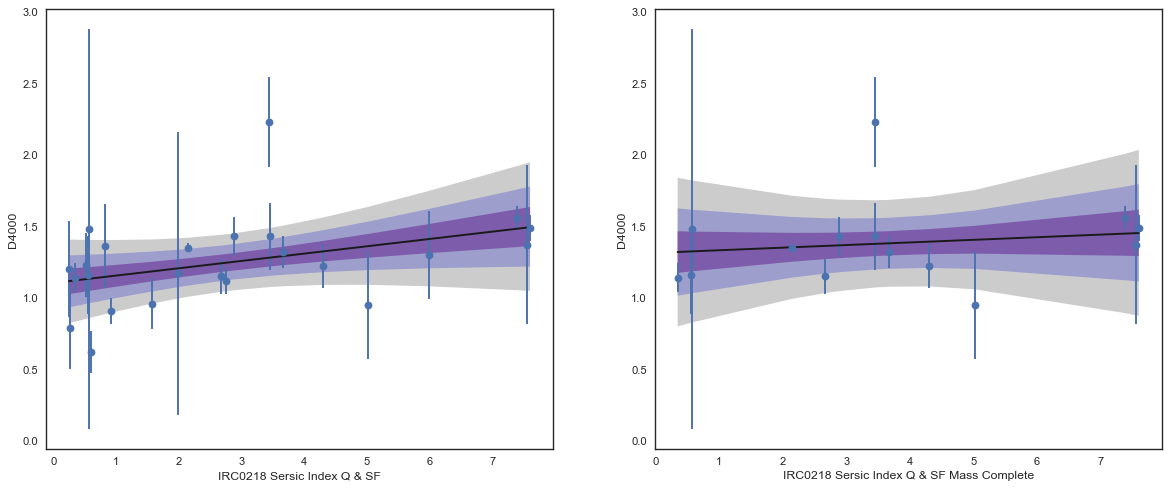

In [117]:
ircn_all(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3,xcb1)

BCES, 10000 trials... 
2.779417 s
BCES, 10000 trials... 
2.819049 s


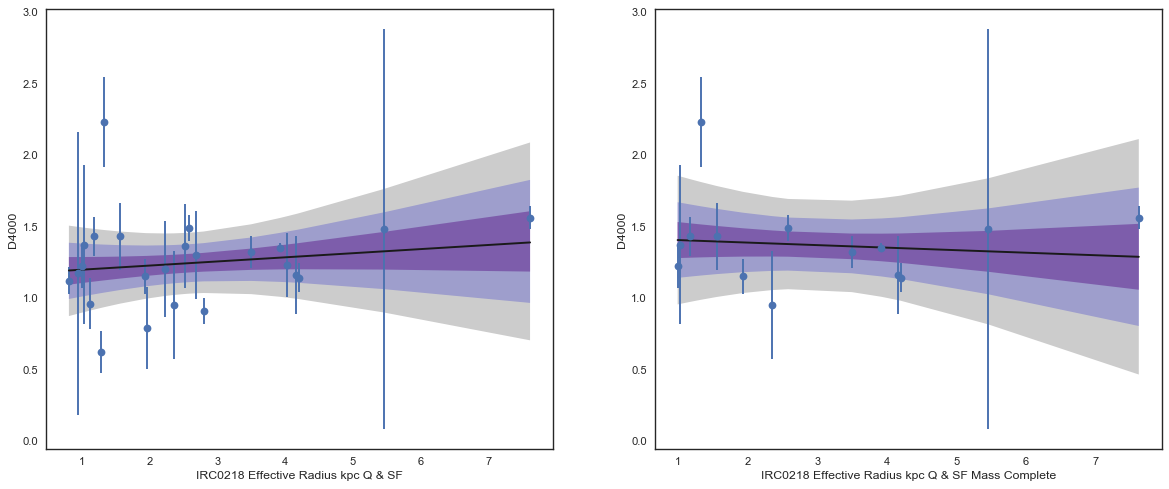

In [119]:
ircr_all(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3,xcb1)

BCES, 10000 trials... 
2.791039 s
BCES, 10000 trials... 
3.475104 s


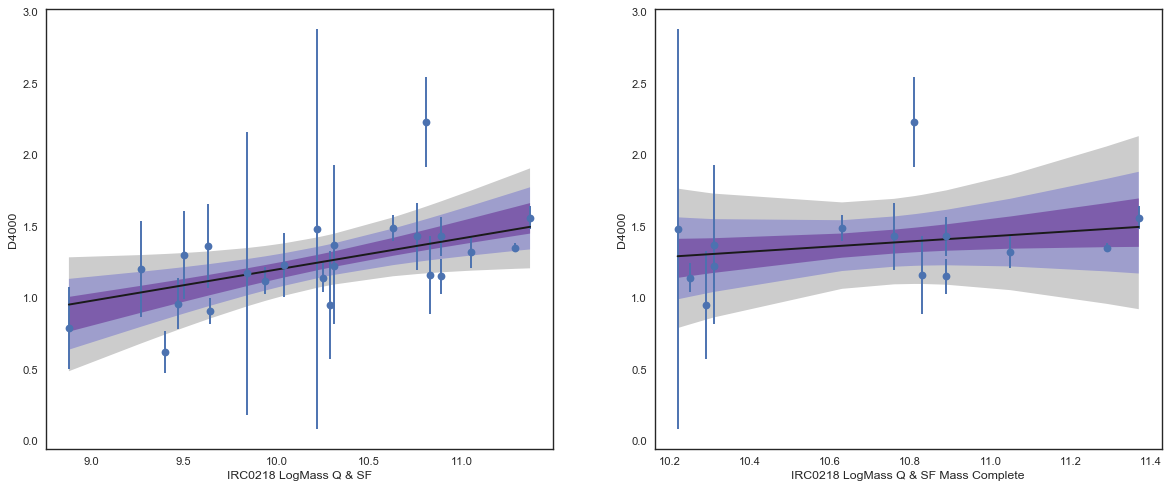

In [152]:
ircm_all(x,y,yer,lcb1,lcb2,lcb3,ucb1,ucb2,ucb3,xcb1)